In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
df = pd.read_csv("monthly_milk_production.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [11]:
df.shape
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [12]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [9]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

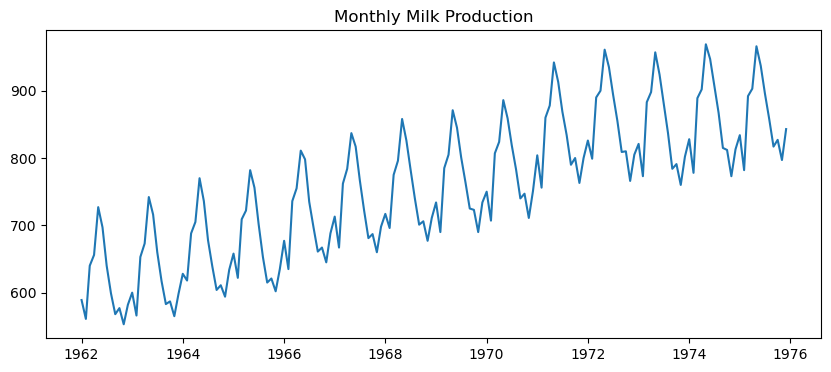

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title("Monthly Milk Production")
plt.show()

In [15]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df.values)

In [22]:
def create_sequences(data, seq_len=12):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 12
X, y = create_sequences(data, seq_len)

train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [23]:
input_size = 1
hidden_size = 20
output_size = 1
lr = 0.01
epochs = 200

# Initializing weights
Wx = np.random.randn(hidden_size, input_size)
Wh = np.random.randn(hidden_size, hidden_size)
Wy = np.random.randn(output_size, hidden_size)

bh = np.zeros((hidden_size,1))
by = np.zeros((output_size,1))

In [24]:
for epoch in range(epochs):

    total_loss = 0

    for i in range(len(X_train)):

        h = np.zeros((hidden_size, 1))

        # Forward pass
        for t in range(seq_len):
            x_t = X_train[i][t].reshape(1,1)
            h = np.tanh(np.dot(Wx, x_t) + np.dot(Wh, h) + bh)

        y_pred = np.dot(Wy, h) + by
        y_true = y_train[i].reshape(1,1)

        error = y_pred - y_true
        total_loss += error**2

        # Gradient update (simple)
        dWy = np.dot(error, h.T)
        dby = error

        Wy -= lr * dWy
        by -= lr * dby

    if (epoch+1) % 20 == 0:
        print("Epoch:", epoch+1, "Loss:", float(total_loss))

C:\Users\Admin\AppData\Local\Temp\ipykernel_12156\2764593857.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Epoch:", epoch+1, "Loss:", float(total_loss))


Epoch: 20 Loss: 4.964890908037549
Epoch: 40 Loss: 3.3723972047810395
Epoch: 60 Loss: 3.1721359767977115
Epoch: 80 Loss: 3.1407381454626124
Epoch: 100 Loss: 3.1386596056414633
Epoch: 120 Loss: 3.140486302167231
Epoch: 140 Loss: 3.1420001986252606
Epoch: 160 Loss: 3.142883756182583
Epoch: 180 Loss: 3.1433546415033717
Epoch: 200 Loss: 3.1435989864756264


In [25]:
predictions = []

for i in range(len(X_test)):

    h = np.zeros((hidden_size, 1))

    for t in range(seq_len):
        x_t = X_test[i][t].reshape(1,1)
        h = np.tanh(np.dot(Wx, x_t) + np.dot(Wh, h) + bh)

    y_pred = np.dot(Wy, h) + by
    predictions.append(y_pred[0][0])

predictions = np.array(predictions).reshape(-1,1)

# Inverse scale
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

In [26]:
rmse = math.sqrt(mean_squared_error(actual, predictions))
print("RMSE:", rmse)

RMSE: 61.70606598108059


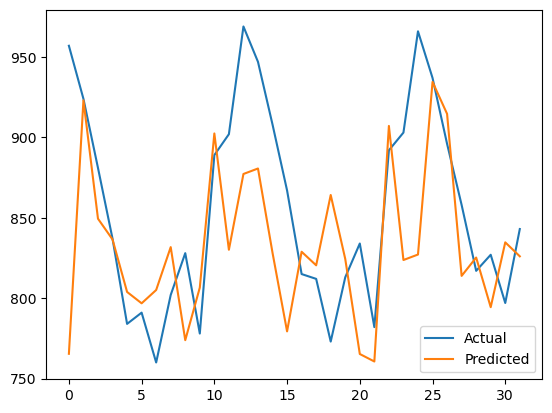

In [27]:
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error

rmse = math.sqrt(mean_squared_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)

mape = np.mean(np.abs((actual - predictions) / actual)) * 100

print("RMSE :", rmse)
print("MAE  :", mae)
print("MAPE :", mape, "%")

RMSE : 61.70606598108059
MAE  : 44.61706760758793
MAPE : 5.084054786875128 %


In [29]:
future_input = X_test[-1]     # last available 12 months
future_predictions = []

for _ in range(12):
    
    h = np.zeros((hidden_size, 1))
    
    # Forward pass
    for t in range(seq_len):
        x_t = future_input[t].reshape(1,1)
        h = np.tanh(np.dot(Wx, x_t) + np.dot(Wh, h) + bh)
    
    y_future = np.dot(Wy, h) + by
    
    # Store prediction
    future_predictions.append(y_future[0][0])
    
    # Update input sequence (slide window)
    future_input = np.append(future_input[1:], [[y_future[0][0]]], axis=0)

# Convert to numpy array
future_predictions = np.array(future_predictions).reshape(-1,1)

# Inverse scaling
future_predictions = scaler.inverse_transform(future_predictions)

print("Next 12 Months Forecast:")
print(future_predictions)

Next 12 Months Forecast:
[[ 826.02955148]
 [ 756.40541605]
 [ 780.87078679]
 [ 910.8013212 ]
 [ 821.68285386]
 [ 754.45298284]
 [ 952.23787219]
 [1005.14276972]
 [ 845.70391725]
 [ 830.22543244]
 [ 847.22919185]
 [ 822.00991656]]


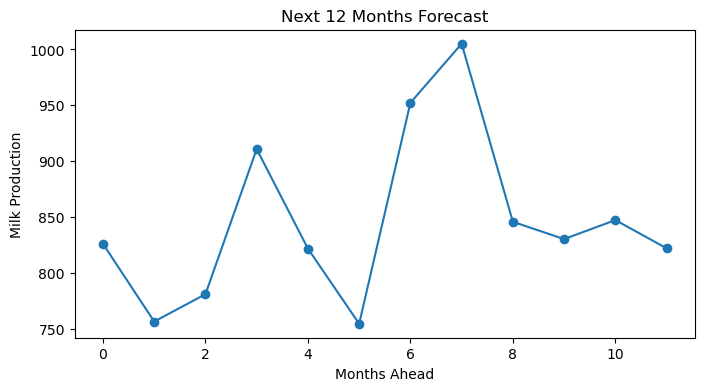

In [30]:
plt.figure(figsize=(8,4))
plt.plot(future_predictions, marker='o')
plt.title("Next 12 Months Forecast")
plt.xlabel("Months Ahead")
plt.ylabel("Milk Production")
plt.show()